## Hierarchical Clustering
Hierarchical clustering is an unsupervised learning algorithm used to group similar data points into clusters, while also building a hierarchy (tree-like structure) of clusters.
- Unlike K-Means, you don’t need to specify the number of clusters in advance.

- Output can be represented by a dendrogram (tree diagram showing merges/splits).


### Two Main Types
##### 1. Agglomerative (Bottom-Up, Most Common)
- Start: Each point = its own cluster.
- Iteratively merge the two closest clusters until all points form one big cluster.

##### 2. Divisive (Top-Down, Rarely Used)
- Start: All points in one big cluster.
- Iteratively split clusters until every point is its own cluster.

### Agglomerative Hierarchical Clustering (Bottom–Up)

#### What is Agglomerative Clustering?
- It’s the most common type of hierarchical clustering.

- Bottom–Up approach:

    - Start with each data point as its own cluster.

    - Gradually merge the closest clusters.

    - Repeat until only one cluster remains.

- The result is visualized with a dendrogram (tree diagram).

#### How It Works (Step by Step)
1. Initialization

    - Suppose you have 5 data points: A, B, C, D, E.

    - Start: each point = its own cluster

    - {A}, {B}, {C}, {D}, {E}

2. Compute Distance Matrix

    - Calculate pairwise distances between all clusters (Euclidean is common).

3. Merge Closest Clusters

    - Find the two clusters with the smallest distance.

    - Merge them into a single cluster.

    - Example: if A and B are closest → {A, B}

4. Update Distance Matrix

    - Recompute distances between new cluster {A, B} and other clusters.

    - Use a linkage method:

        - Single Linkage → minimum distance

        - Complete Linkage → maximum distance

        - Average Linkage → average distance

        - Ward’s Method → minimize variance

5. Repeat

    - Merge the next closest clusters.

    - Continue until all data points belong to a single cluster.

6. Form Final Clusters

    - Cut the dendrogram at a chosen distance (height).

    - Example: Cut at height = 3 → get 2 or 3 meaningful clusters.

Example Analogy (Colleges)

- Start: {GCT}, {PSG}, {BIT}
- Step 1: PSG & BIT are closest (both private) → merge {PSG, BIT}
    - {PSG, BIT}(private), {GCT}(Govt)
- Step 2: GCT is merged later with {PSG, BIT} → {GCT, PSG, BIT}

- If we cut the dendrogram before GCT joins, we get 2 clusters: Govt vs Private.

In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

data = {
    "Age": [22, 25, 28, 30, 32, 35, 40, 45, 50, 55],
    "Income_LPA": [16, 8, 10, 9, 15, 12, 22, 26, 10, 35],
} #no target (output)

df = pd.DataFrame(data)
print(df)


   Age  Income_LPA
0   22          16
1   25           8
2   28          10
3   30           9
4   32          15
5   35          12
6   40          22
7   45          26
8   50          10
9   55          35


In [28]:
# Select features
X = df[["Age", "Income_LPA"]]

# Scale features
X_scaled = StandardScaler().fit_transform(X)

In [29]:
# Perform Agglomerative Clustering (Ward’s method)
Z = linkage(X_scaled, method="ward")

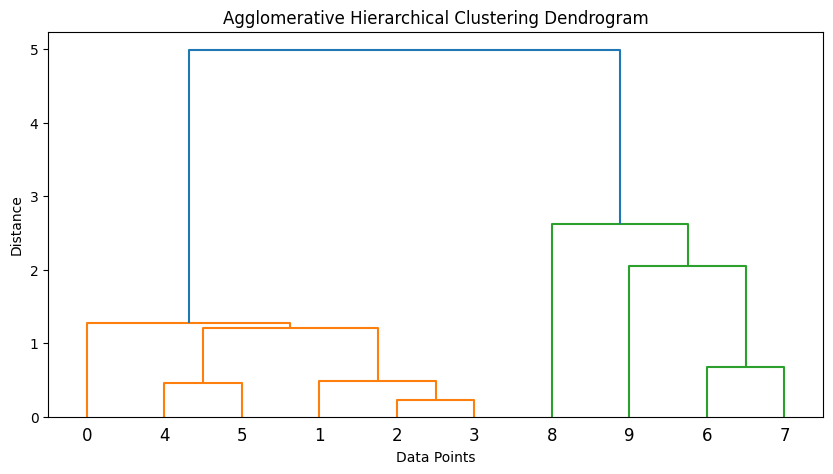

In [30]:
import matplotlib.pyplot as plt

# Plot dendrogram(tree like struct)
plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode="level", p=5)
plt.title("Agglomerative Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [31]:
# Cut dendrogram into 2 clusters
clusters = fcluster(Z, t=2, criterion="maxclust")
df["buy_house"] = clusters

In [32]:
df

,Age,Income_LPA,buy_house
0,22,16,1
1,25,8,1
2,28,10,1
3,30,9,1
4,32,15,1
5,35,12,1
6,40,22,2
7,45,26,2
8,50,10,2
9,55,35,2


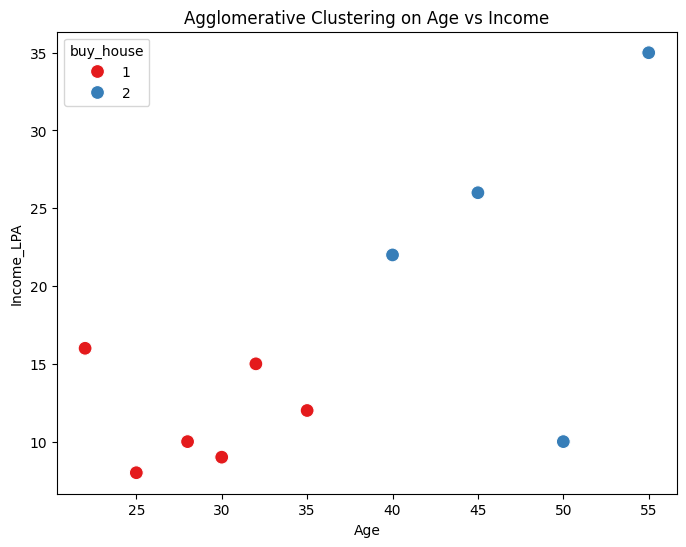

In [33]:
import seaborn as sns
# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Age", y="Income_LPA", hue="buy_house", palette="Set1", s=100)
plt.title("Agglomerative Clustering on Age vs Income")
plt.show()

---

### Divisive Hierarchical Clustering(Top Down)

#### What is it?

- Divisive means “Top–Down”.

- Start with all data points in one cluster.

- Iteratively split clusters into smaller ones until every point is its own cluster (or until you reach the desired number of clusters).

#### How it Works (Steps)

- Start with all data points as a single cluster.

- Pick a cluster to split (usually the one with the largest variance).

- Decide a splitting criterion (often K-Means or distance-based).

- Continue splitting clusters recursively until you reach the stopping condition:

    - Predefined number of clusters (k), or

    - Minimum cluster size, or

    - Maximum depth.

Example (Colleges analogy)

- Imagine all colleges (GCT, PSG, BIT) are one big cluster.

- First split → Govt vs Private.

- Next split private → PSG vs BIT.

- Now we have 3 clusters: GCT, PSG, BIT.

In [34]:
# Sample dataset
data = {
    "Age": [22, 25, 28, 30, 32, 35, 40, 45, 50, 55],
    "Income_LPA": [16, 8, 10, 9, 15, 12, 22, 26, 10, 35]
}
df = pd.DataFrame(data)

In [35]:
# Step 1: Start with all points in one cluster
df['buy_house'] = 0

In [36]:
df

,Age,Income_LPA,buy_house
0,22,16,0
1,25,8,0
2,28,10,0
3,30,9,0
4,32,15,0
5,35,12,0
6,40,22,0
7,45,26,0
8,50,10,0
9,55,35,0


In [37]:
from sklearn.cluster import KMeans

# Step 2: Split the largest cluster (Cluster(buy_house) 0) into 2 using KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
df['buy_house'] = kmeans.fit_predict(df[['Age','Income_LPA']])

In [38]:
df

,Age,Income_LPA,buy_house
0,22,16,0
1,25,8,0
2,28,10,0
3,30,9,0
4,32,15,0
5,35,12,0
6,40,22,0
7,45,26,1
8,50,10,0
9,55,35,1


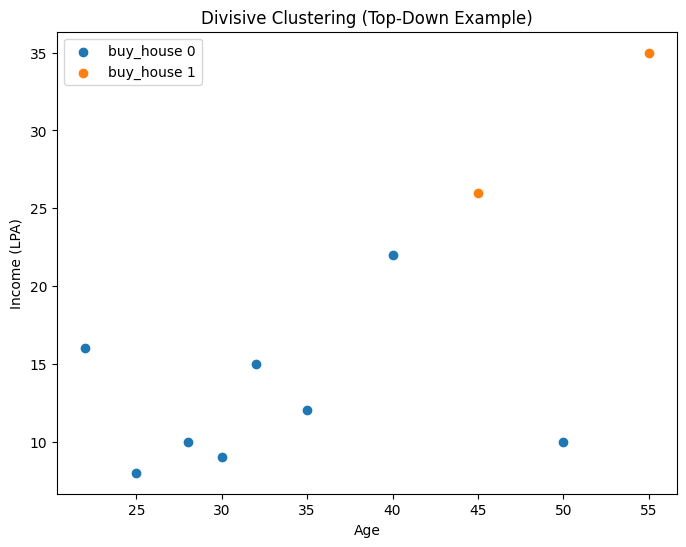

In [39]:
plt.figure(figsize=(8,6))
for cluster in df['buy_house'].unique():
    subset = df[df['buy_house'] == cluster]
    plt.scatter(subset['Age'], subset['Income_LPA'], label=f'buy_house {cluster}')

plt.xlabel("Age")
plt.ylabel("Income (LPA)")
plt.title("Divisive Clustering (Top-Down Example)")
plt.legend()
plt.show()